In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

In [2]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size']=14

In [25]:
CDM_i_1 = 7
tcDM_i_1 = 7

snap_CDM_1 = h5py.File('/media/ryan/Elements/run_CDM_L3N128/snap_00{}.hdf5'.format(CDM_i_1), 'r')
snap_2cDM_1 = h5py.File('/media/ryan/Elements/run_2cDM_L3N128/snap_00{}.hdf5'.format(tcDM_i_1), 'r')
Redshift_CDM_1 ="{:.2f}".format(snap_CDM_1['Header'].attrs['Redshift'])
Redshift_2cDM_1 = "{:.2f}".format(snap_2cDM_1['Header'].attrs['Redshift'])

#CDM_i_2 = 7
tcDM_i_2 = 7

#snap_CDM_2 = h5py.File('/media/ryan/Elements/run_CDM_L3N256/snap_00{}.hdf5'.format(CDM_i_2), 'r')
snap_2cDM_2 = h5py.File('/home/ryan/Downloads/run_2cDM_L3N512/snap_00{}.hdf5'.format(tcDM_i_2), 'r')
#Redshift_CDM_2 ="{:.2f}".format(snap_CDM_2['Header'].attrs['Redshift'])
Redshift_2cDM_2 = "{:.2f}".format(snap_2cDM_2['Header'].attrs['Redshift'])

fpath = '/home/ryan/Downloads/plots_compare_small/'
pkpath_1 = '/home/ryan/projects/dm_sims/genPK/run_L3N128/'
pkpath_2 = '/home/ryan/projects/dm_sims/genPK/run_L3N128_small/'


print(Redshift_CDM_1)
print(Redshift_2cDM_1)
#print(Redshift_CDM_2)
print(Redshift_2cDM_2)
(Redshift_CDM_1 == Redshift_2cDM_1) and (Redshift_CDM_1 == Redshift_2cDM_2)

0.00
0.00
0.00


True

In [4]:
def calculate_fourier_conversion(Boxsize):
    '''
    Takes the Boxsize in kpc and produces the conversion factors
    from Fourier units to physical units. For use with genPK output.
    '''
    Boxsize = Boxsize / 1000 # convert to Mpc

    k_conv = 2*np.pi / Boxsize
    p_conv = (Boxsize / (2 * np.pi))**3
    
    return k_conv, p_conv

In [5]:
Boxsize_1 = int((snap_CDM_1['Header'].attrs['BoxSize'])) # in kpc
Boxsize_2 = int((snap_2cDM_2['Header'].attrs['BoxSize'])) # in kpc

k_conv_1, p_conv_1 = calculate_fourier_conversion(Boxsize_1)
k_conv_2, p_conv_2 = calculate_fourier_conversion(Boxsize_2)

In [6]:
def get_genPK_data(fpath, k_conv, p_conv):
    
    genPK = np.loadtxt(fpath)
    
    bins = genPK[:, 0]
    pk = genPK[:, 1]
    
    dk = pk * (2 * np.pi)**3 * (4 * np.pi) * bins**3
    
    bins = genPK[:, 0] * k_conv
    
    pk = genPK[:, 1] * p_conv
    
    return bins, pk, dk

In [7]:
# get DM data for both

cdm_str = 'PK-DM-snap_00{}_CDM.hdf5'
tcdm_str = 'PK-DM-snap_00{}_2cDM.hdf5'

bins_cdm_1, pk_cdm_1, dk_cdm_1 = get_genPK_data(pkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
bins_2cdm_1, pk_2cdm_1, dk_2cdm_1 = get_genPK_data(pkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)
#bins_cdm_2, pk_cdm_2, dk_cdm_2 = get_genPK_data(pkpath_2 + cdm_str.format(CDM_i_2),\
#                                                k_conv_2, p_conv_2)
bins_2cdm_2, pk_2cdm_2, dk_2cdm_2 = get_genPK_data(pkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

In [8]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


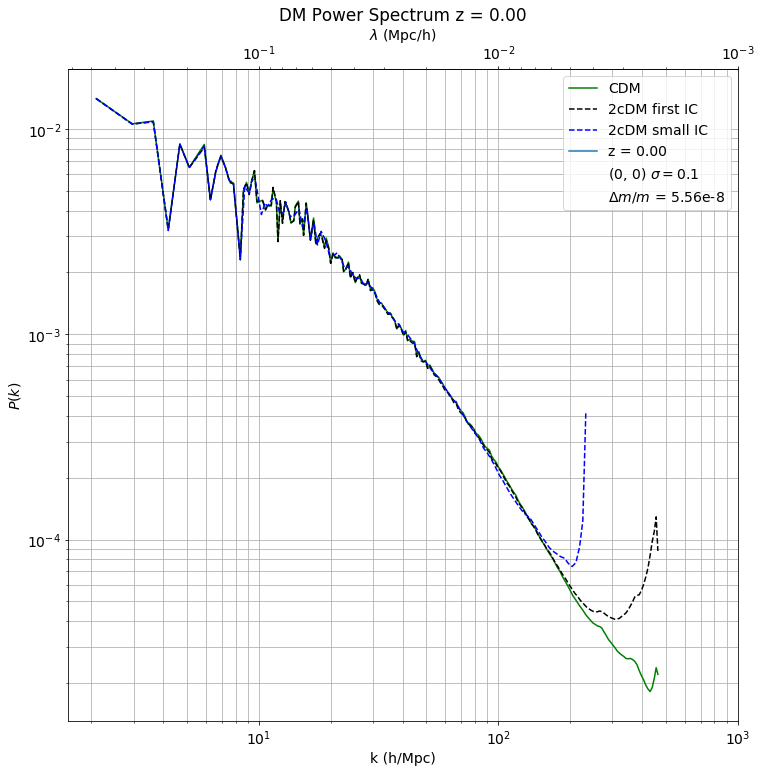

In [9]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm_1,pk_cdm_1, label='CDM', color='g')
ax.plot(bins_2cdm_1,pk_2cdm_1, '--',label='2cDM first IC', color='k')
#ax.plot(bins_cdm_2,pk_cdm_2, label='CDM N256', color='r')
ax.plot(bins_2cdm_2,pk_2cdm_2, '--',label='2cDM small IC', color='b')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('DM Power Spectrum z = {}'.format(Redshift_CDM_1))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'DM_Power_Spectrum_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()

ValueError: operands could not be broadcast together with shapes (104,) (199,) 

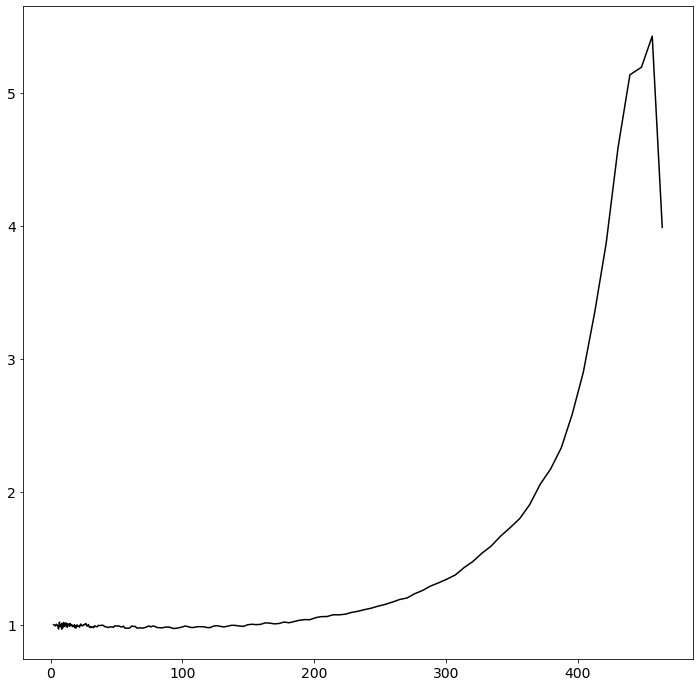

In [10]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='k', label='first IC')
#ax.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='b', label='N256')
ax.plot(bins_2cdm_2, pk_2cdm_2 / pk_cdm_1, color='b', label='small IC')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)
ax.set_ylim(0, 1.3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('Ratio of DM Power Spectra z = {}'.format(Redshift_CDM_1))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'DM_Spectrum_Ratio_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


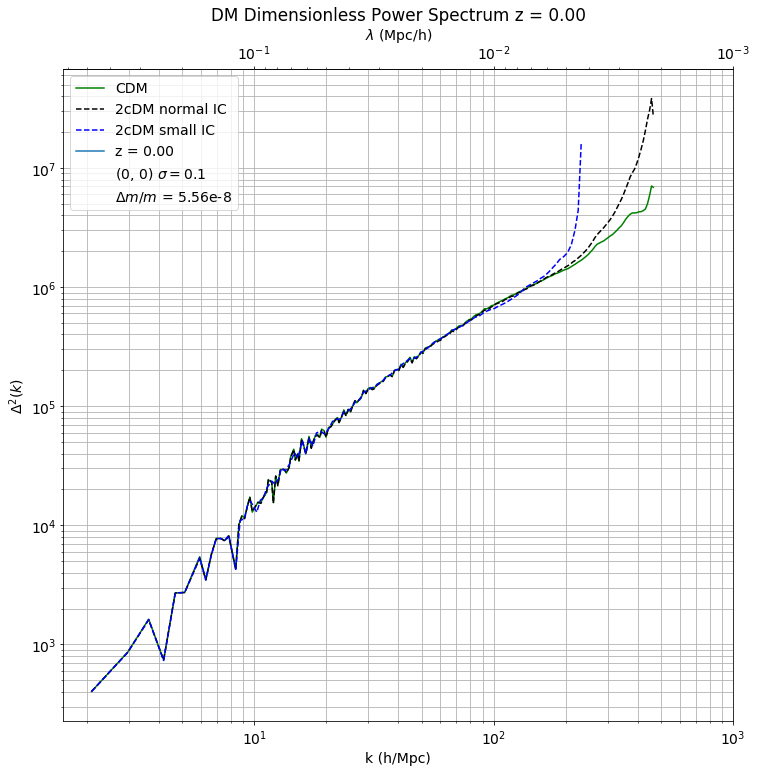

In [11]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm_1,dk_cdm_1, label='CDM', color='g')
ax.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM normal IC', color='k')
#ax.plot(bins_cdm_2,dk_cdm_2, label='CDM N128', color='r')
ax.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM small IC', color='b')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_1))
plt.grid(True, which="both", ls="-")
plt.legend()
fname = 'DM_Dimless_Spectrum_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()

In [12]:
# get by data for both

cdm_str = 'PK-by-snap_00{}_CDM.hdf5'
tcdm_str = 'PK-by-snap_00{}_2cDM.hdf5'

bins_cdm_1, pk_cdm_1, dk_cdm_1 = get_genPK_data(pkpath_1 + cdm_str.format(CDM_i_1),\
                                                k_conv_1, p_conv_1)
bins_2cdm_1, pk_2cdm_1, dk_2cdm_1 = get_genPK_data(pkpath_1 + tcdm_str.format(tcDM_i_1),\
                                                k_conv_1, p_conv_1)
#bins_cdm_2, pk_cdm_2, dk_cdm_2 = get_genPK_data(pkpath_2 + cdm_str.format(CDM_i_2),\
#                                                k_conv_2, p_conv_2)
bins_2cdm_2, pk_2cdm_2, dk_2cdm_2 = get_genPK_data(pkpath_2 + tcdm_str.format(tcDM_i_2),\
                                                k_conv_2, p_conv_2)

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


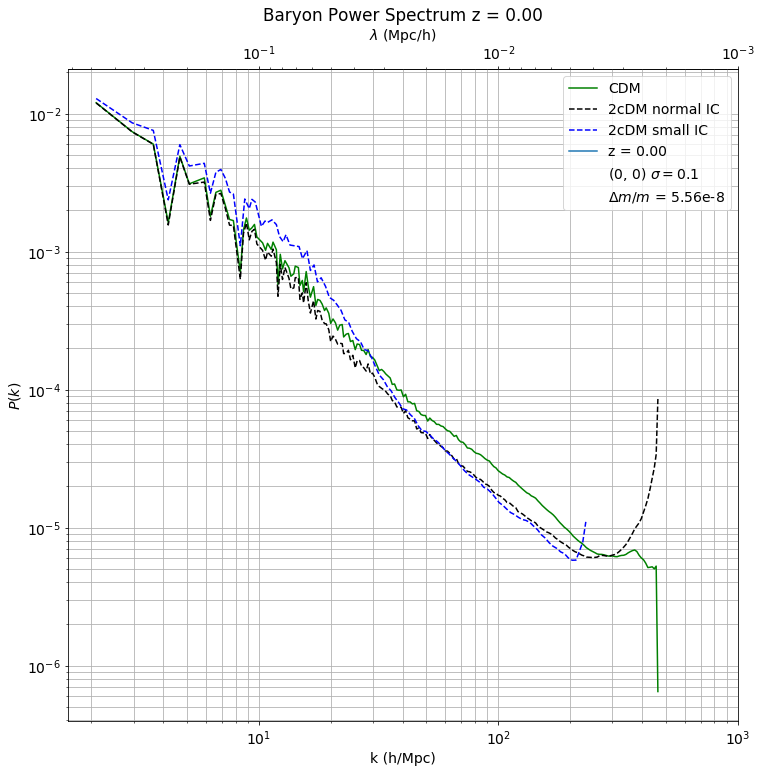

In [13]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm_1,pk_cdm_1, label='CDM', color='g')
ax.plot(bins_2cdm_1,pk_2cdm_1, '--',label='2cDM normal IC', color='k')
#ax.plot(bins_cdm_2,pk_cdm_2, label='CDM N256', color='r')
ax.plot(bins_2cdm_2,pk_2cdm_2, '--',label='2cDM small IC', color='b')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('Baryon Power Spectrum z = {}'.format(Redshift_CDM_1))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'BY_Power_Spectrum_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()

ValueError: operands could not be broadcast together with shapes (104,) (199,) 

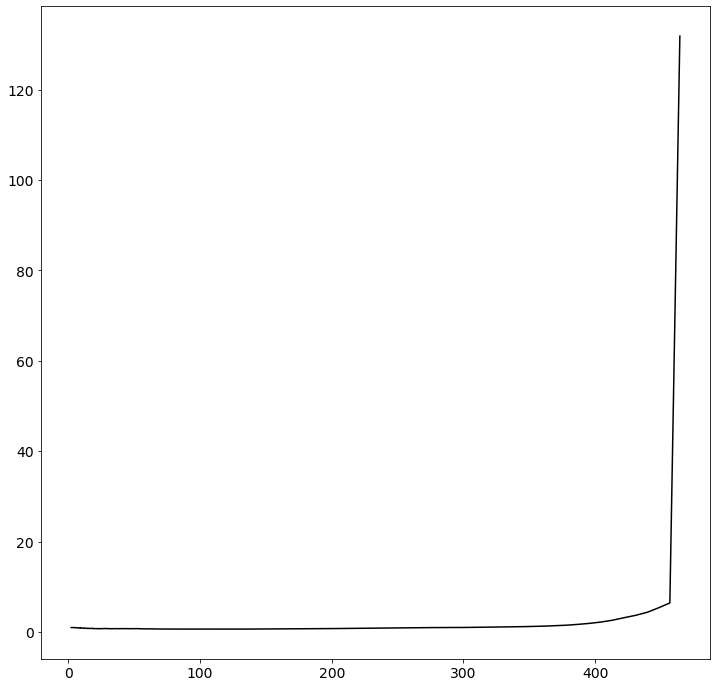

In [14]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_2cdm_1 ,pk_2cdm_1 / pk_cdm_1, color='k', label='normal IC')
#ax.plot(bins_2cdm_2 ,pk_2cdm_2 / pk_cdm_2, color='b', label='N256')
ax.plot(bins_2cdm_2, pk_2cdm_2 / pk_cdm_1, color='b', label='small IC')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)
ax.set_ylim(0, 1.3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('Ratio of Baryon Power Spectra z = {}'.format(Redshift_CDM_1))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'BY_Spectrum_Ratio_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


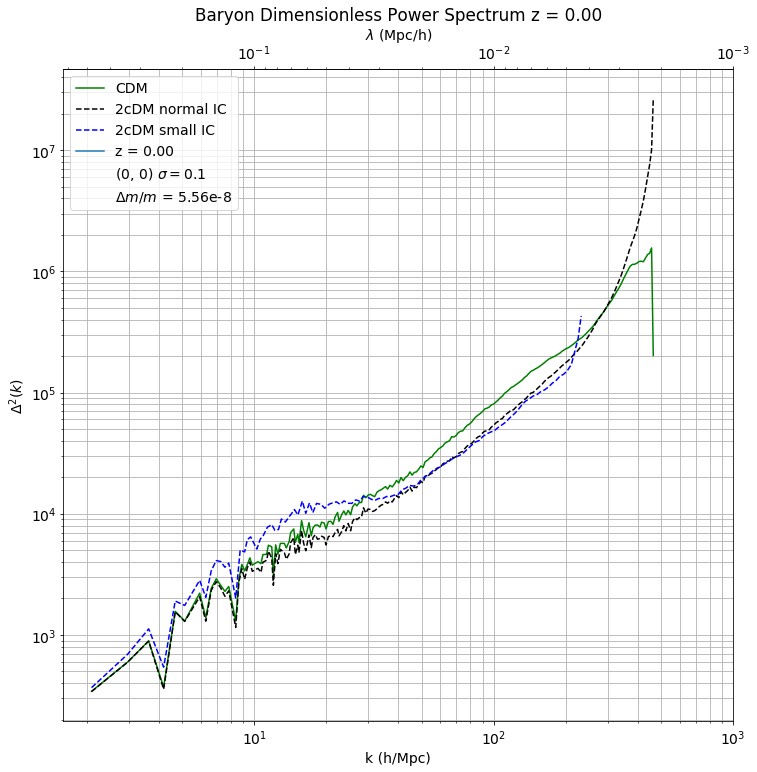

In [16]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm_1,dk_cdm_1, label='CDM', color='g')
ax.plot(bins_2cdm_1,dk_2cdm_1, '--',label='2cDM normal IC', color='k')
#ax.plot(bins_cdm_2,dk_cdm_2, label='CDM N128', color='r')
ax.plot(bins_2cdm_2,dk_2cdm_2, '--',label='2cDM small IC', color='b')
ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM_1))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$', alpha=0)
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)

ax.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
plt.title('Baryon Dimensionless Power Spectrum z = {}'.format(Redshift_CDM_1))
plt.grid(True, which="both", ls="-")
plt.legend()
fname = 'BY_Dimless_Spectrum_L{}_z={}.png'.format(Boxsize_1, Redshift_CDM_1)
plt.savefig(fpath+fname, dpi=150)
plt.show()